In [256]:
import pandas as pd
import numpy as np

In [257]:
raw_data = pd.read_csv("kc_house_data.csv")
raw_data.head()

,sqft,floors,bedrooms,bathrooms,price
0,5650,1.0,3,1.00,221900.0
1,7242,2.0,3,2.25,538000.0
2,10000,1.0,2,1.00,180000.0
3,5000,1.0,4,3.00,604000.0
4,8080,1.0,3,2.00,510000.0


In [258]:
data = np.array(raw_data)

In [259]:
no_of_examples = data.shape[0]
no_of_features = data.shape[1]-1

In [260]:
no_train = int(0.8*no_of_examples)
no_train

17290

In [261]:
X_train = data[:no_train,:-1]
y_train = data[:no_train,-1]
X_test = data[no_train:,:-1]
y_test = data[no_train:,-1]

In [262]:
X_mean = np.mean(X_train,axis=0)
X_std = np.std(X_train,axis=0)
X_train = (X_train - X_mean)/X_std
X_test = (X_test-X_mean)/X_std

In [263]:
y_mean = np.mean(y_train,axis=0)
y_std = np.std(y_train,axis=0)
y_train = (y_train - y_mean)/y_std

In [264]:
class Linear_model:
    def __init__(self,m,X,y):
        #self.W = np.zeros((m,1))
        self.W = np.random.rand(m,1)
        self.b = 0
        self.X = X
        self.N = X.shape[0]
        self.y = y.reshape((self.N,1))
        
        
    def train(self, lr = 0.1, reg = 0):
        pred = (self.X).dot(self.W) + self.b
        err = pred - self.y
        err2 = err**2
        loss = np.sum(err2)/self.N
        loss += reg*np.sum(self.W**2)
        
        grad = (self.X).T.dot(err)
        grad *= 2/self.N
        
        grad += 2*reg*self.W
        
        self.W -= lr*grad
        self.b -= lr*np.sum(err)*2/self.N
        
        return loss
    
    def evaluate(self,X_test):
        return (X_test).dot(self.W) + self.b      
        
        
        

In [284]:
lrs = [0.001,0.002,0.005,0.01,0.02,0.05,0.08,0.1]

In [285]:
no_of_epochs = 500
loss_linear = []
for l in lrs:
    model = Linear_model(no_of_features, X_train,y_train)
    for i in range(no_of_epochs):
        loss = model.train(lr=l)
    pred_test = model.evaluate(X_test)
    pred_test = (pred_test)*y_std + y_mean
    #test_loss = np.sqrt(np.sum(((pred_test - y_test)**2))/X_test.shape[0])
    test_loss = np.sqrt(np.mean(np.square(pred_test - y_test)))
    loss_linear.append(test_loss)
loss_linear

[438629.80739207327,
 420247.09204506438,
 415991.24810362962,
 420934.01040698314,
 421243.23494658782,
 421258.05964432197,
 421258.05991708988,
 421258.05991709064]

In [286]:
import matplotlib.pyplot as plt

Text(0,0.5,'RMSE')

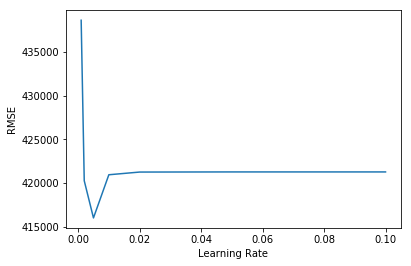

In [287]:
%matplotlib inline
plt.plot(lrs,loss_linear)
plt.xlabel("Learning Rate")
plt.ylabel("RMSE")

In [288]:
X_train_q = data[:no_train,:-1]
y_train_q = data[:no_train,-1]
X_test_q = data[no_train:,:-1]
y_test_q = data[no_train:,-1]
for i in range(no_of_features):
    for j in range(i,no_of_features):
        new = X_train_q[:,i]*X_train_q[:,j]
        new = new.reshape(new.shape[0],1)
        X_train_q = np.concatenate((X_train_q,new),axis=1)
        new = X_test_q[:,i]*X_test_q[:,j]
        new = new.reshape(new.shape[0],1)
        X_test_q = np.concatenate((X_test_q,new),axis=1)
        
X_mean_q = np.mean(X_train_q,axis=0)
X_std_q = np.std(X_train_q,axis=0)
X_train_q = (X_train_q - X_mean_q)/X_std_q
X_test_q = (X_test_q-X_mean_q)/X_std_q

y_mean_q = np.mean(y_train_q,axis=0)
y_std_q = np.std(y_train_q,axis=0)
y_train_q = (y_train_q - y_mean_q)/y_std_q

print(X_train_q.shape,X_test_q.shape,y_train_q.shape,y_test_q.shape)

(17290, 14) (4323, 14) (17290,) (4323,)


In [294]:
no_of_epochs = 300
no_of_features_q = X_train_q.shape[1]
print(no_of_features_q)
losses = {}
loss_quad = []
for l in lrs:
    model = Linear_model(no_of_features_q, X_train_q,y_train_q)
    losses[l] = []
    for i in range(no_of_epochs):
        loss = model.train(lr=l)
        losses[l].append(loss)
    pred_test = model.evaluate(X_test_q)
    pred_test = pred_test*y_std_q + y_mean_q
    #test_loss = np.sqrt(np.sum((np.square(pred_test - y_test_q)))/X_test_q.shape[0])
    test_loss = np.sqrt(np.mean(np.square(pred_test - y_test_q)))
    loss_quad.append(test_loss)
loss_quad

14


[434245.15414530598,
 430947.32038465503,
 434393.36225467979,
 432632.8257132154,
 432554.458139972,
 438796.28698509233,
 440861.56159345096,
 441643.15000294329]

Text(0,0.5,'RMSE')

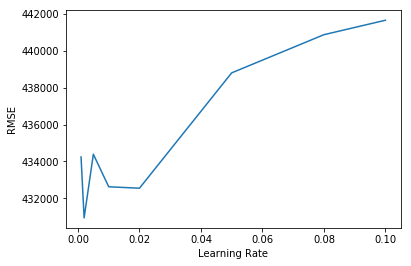

In [295]:
plt.plot(lrs,loss_quad)
plt.xlabel("Learning Rate")
plt.ylabel("RMSE")

In [296]:
X_train_c = data[:no_train,:-1]
y_train_c = data[:no_train,-1]
X_test_c = data[no_train:,:-1]
y_test_c = data[no_train:,-1]
for i in range(no_of_features):
    for j in range(i,no_of_features):
        for k in range(j,no_of_features):
            new = X_train_c[:,i]*X_train_c[:,j]
            new = new.reshape(new.shape[0],1)
            X_train_c = np.concatenate((X_train_c,new),axis=1)
            new = X_test_c[:,i]*X_test_c[:,j]
            new = new.reshape(new.shape[0],1)
            X_test_c = np.concatenate((X_test_c,new),axis=1)
        
X_mean_c = np.mean(X_train_c,axis=0)
X_std_c = np.std(X_train_c,axis=0)
X_train_c = (X_train_c - X_mean_c)/X_std_c
X_test_c = (X_test_c-X_mean_c)/X_std_c

y_mean_c = np.mean(y_train_c,axis=0)
y_std_c = np.std(y_train_c,axis=0)
y_train_c = (y_train_c - y_mean_c)/y_std_c

print(X_train_c.shape,X_test_c.shape,y_train_c.shape,y_test_c.shape)

(17290, 24) (4323, 24) (17290,) (4323,)


In [297]:
no_of_epochs = 3000
no_of_features_c = X_train_c.shape[1]
print(no_of_features_c)
losses = {}
loss_cube = []
for l in lrs:
    model = Linear_model(no_of_features_c, X_train_c,y_train_c)
    losses[l] = []
    for i in range(no_of_epochs):
        loss = model.train(lr=l)
        losses[l].append(loss)
    pred_test = model.evaluate(X_test_c)
    pred_test = (pred_test)*y_std_c + y_mean_c
    #test_loss = np.sqrt(np.sum((np.square(pred_test - y_test_q)))/X_test_q.shape[0])
    test_loss = np.sqrt(np.mean(np.square(pred_test - y_test_c)))
    loss_cube.append(test_loss)
loss_cube

24


[447467.97741375299,
 442660.53600651992,
 440029.14863472525,
 443838.61778225657,
 443955.8067410473,
 445375.48096975544,
 445468.13132419938,
 445472.50387592317]

Text(0,0.5,'RMSE')

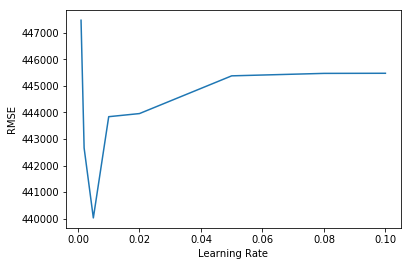

In [298]:
plt.plot(lrs,loss_cube)
plt.xlabel("Learning Rate")
plt.ylabel("RMSE")